Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0

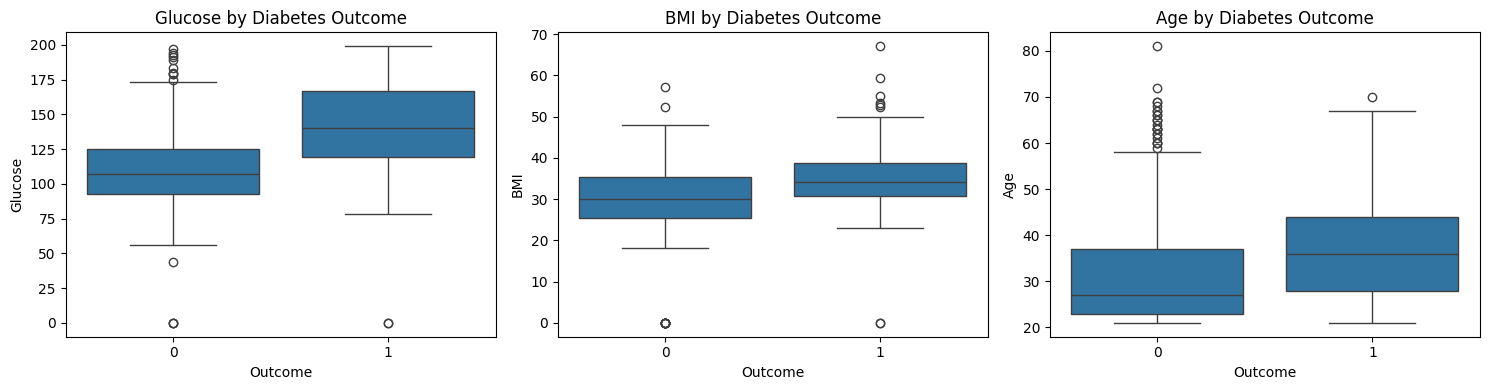


Correlation with Outcome:
 Outcome                     1.000
Glucose                     0.467
BMI                         0.293
Age                         0.238
Pregnancies                 0.222
DiabetesPedigreeFunction    0.174
Insulin                     0.131
SkinThickness               0.075
BloodPressure               0.065
Name: Outcome, dtype: float64

Train samples: 576, Test samples: 192
Diabetes proportion in train: 0.349
Diabetes proportion in test : 0.349

Model trained!
Intercept: -8.6175
Coefficients:
Pregnancies            : 0.1320
Glucose                : 0.0357
BloodPressure          : -0.0114
SkinThickness          : -0.0003
Insulin                : -0.0008
BMI                    : 0.0947
DiabetesPedigreeFunction : 0.6499
Age                    : 0.0129

Test performance:
Accuracy          : 0.729  (72.9%)
ROC AUC           : 0.831

Confusion Matrix:
[[105  20]
 [ 32  35]]

Classification Report:
                 precision    recall  f1-score   support

No Diabetes

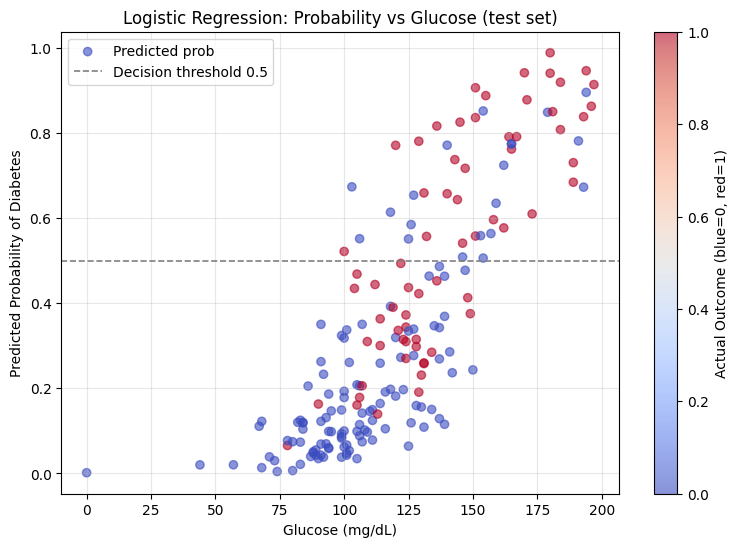


Done!
Interpretation example:
→ Higher Glucose is strongly associated with higher probability of diabetes
→ The model achieves ~73% accuracy using only linear combinations of these features.


In [1]:
# ────────────── Step 1: Import libraries ──────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# ────────────── Step 2: Load the data correctly ──────────────
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=col_names)

print("Columns:", df.columns.tolist())
print(df.head(8))
print("\nTarget distribution:\n", df['Outcome'].value_counts(normalize=True).round(3))

# ────────────── Step 3: Quick inspection ──────────────
print("\nShape:", df.shape)
print(df.info())
print("\nDescribe:\n", df.describe().round(2))

# ────────────── Step 4: Visualize important relationships ──────────────
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose by Diabetes Outcome")

plt.subplot(1, 3, 2)
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("BMI by Diabetes Outcome")

plt.subplot(1, 3, 3)
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Age by Diabetes Outcome")

plt.tight_layout()
plt.show()

# Optional: correlation with target
print("\nCorrelation with Outcome:\n", 
      df.corr(numeric_only=True)['Outcome'].sort_values(ascending=False).round(3))

# ────────────── Step 5: Prepare features and target ──────────────
X = df.drop('Outcome', axis=1)          # all columns except target
y = df['Outcome']                       # 0 = No diabetes, 1 = Diabetes

# ────────────── Step 6: Train-test split ──────────────
# stratify=y → important for imbalanced classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print(f"\nTrain samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")
print(f"Diabetes proportion in train: {y_train.mean():.3f}")
print(f"Diabetes proportion in test : {y_test.mean():.3f}")

# ────────────── Step 7: Train model ──────────────
# We increase max_iter because convergence can be slow without scaling
model = LogisticRegression(max_iter=1500, random_state=42)
model.fit(X_train, y_train)

print("\nModel trained!")
print(f"Intercept: {model.intercept_[0]:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature:22} : {coef:.4f}")

# ────────────── Step 8: Predict ──────────────
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]   # probability of diabetes (class 1)

# ────────────── Step 9: Evaluate ──────────────
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("\nTest performance:")
print(f"Accuracy          : {acc:.3f}  ({acc*100:.1f}%)")
print(f"ROC AUC           : {auc:.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['No Diabetes (0)', 'Diabetes (1)'],
                          digits=3))

# ────────────── Step 10: Visualize predicted probabilities ──────────────
plt.figure(figsize=(9, 6))

# Sort by Glucose for nicer visualization
sorted_idx = np.argsort(X_test['Glucose'].values)
plt.scatter(X_test['Glucose'].values[sorted_idx], 
            y_pred_proba[sorted_idx], 
            c=y_test.values[sorted_idx], 
            cmap='coolwarm', alpha=0.6, 
            label='Predicted prob')

plt.colorbar(label='Actual Outcome (blue=0, red=1)')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1.2, 
            label='Decision threshold 0.5')
plt.xlabel('Glucose (mg/dL)')
plt.ylabel('Predicted Probability of Diabetes')
plt.title('Logistic Regression: Probability vs Glucose (test set)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nDone!")
print("Interpretation example:")
print("→ Higher Glucose is strongly associated with higher probability of diabetes")
print(f"→ The model achieves ~{acc*100:.0f}% accuracy using only linear combinations of these features.")